<a href="https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Arboles/Clase_03_Arboles/03B_%7C_Repaso_II_sobre_%C3%81rboles_Decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 REPASO I: Árboles de Decisión
Repaso sobre cómo utilizar árboles de decisión y cómo realizar la preparación previa de los datos.

Notebook por [Javier Blanco Cordero](https://www.linkedin.com/in/javier-blanco-cordero-71373656/).

### Enlaces de interés
*   [Slides de presentación](https://docs.google.com/presentation/d/1jRg7Dk2y_2_fxnC_Jpj5aWcqgW9t1KAd7izdmWzv9Sk/edit?usp=sharing)
*   [Enlace a este notebook en Colab](https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Arboles/Clase_03_Arboles/03A_%7C_Repaso_I_sobre_%C3%81rboles_Decisi%C3%B3n.ipynb)




## 0101 Qué es un árbol de decisión?
Un tipo de algoritmo de aprendizaje supervisado que se basa en realizar particiones recursivas a partir de distintos niveles de las variables disponibles.

## 0102 Import
Importamos todas las librerías necesarias para este análisis ([¿No sabes lo que es una librería de Python?](https://www.quora.com/What-is-a-Python-library-and-what-can-I-use-it-for)): pandas, numpy, seaborn, matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 0103 Carga el dataset del Titanic
Recordais el dataset del Titanic?

Vamos a hacer un árbol de decisión que prediga si alguien fallece o no, pero esta vez el dataset no está ya limpio y preparado. Este mismo ejemplo lo resolvisteis en el [notebook 2C](https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Arboles/Clase_02_Arboles/02_C_%C3%81rboles_Decisi%C3%B3n_sin_Overfitting_Resuelto.ipynb#scrollTo=EDiMGl7xOm6o).

Para ello utilizaremos el dataset original. Este es el link al archivo raw: https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/titanic.csv.

Importa los datos en un dataframe llamado **dataframe df_titanic**.

In [2]:
# Url archivo raw
url = 'https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/titanic.csv'

# Importa csv
df_titanic = pd.read_csv(url)

# Visualización primeras filas
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 02 EDA
Realizaremos un pequeño análisis exploratorio visual para familiarizarnos con el dataset. 

Recuerda que puedes encontrar mis clases sobre análisis exploratorio [aquí](https://github.com/JotaBlanco/TheValley/tree/main/EDA/).

In [3]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


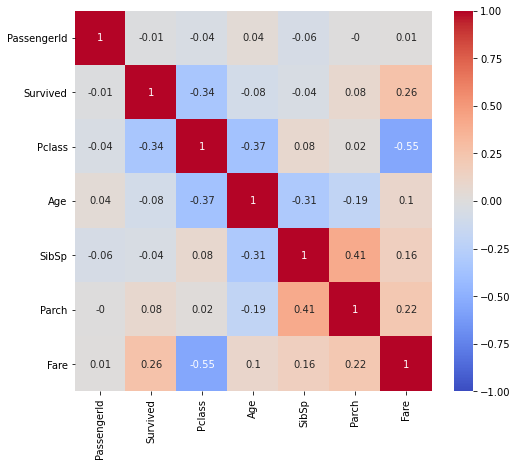

In [5]:
# Visualización coeficientes Pearson
plt.figure(figsize=(8,7))
sns.heatmap(np.round(df_titanic.corr(),2), 
            vmin=-1, vmax=1, 
            annot=True, cmap="coolwarm")
plt.show()

# 03 Preparación de los datos
Primero prepararemos el dataset para que admita un entrenamiento de un árbol de decisión.

## 0301 Creación de variables
Primero, vamos a crear una variable nueva:

In [7]:
# Creamos una nueva variable Título (es opcional, pero podría ayudar al modelo)
df_titanic['Title'] = [name.split(",")[1].split(".")[0][1:] for name in df_titanic['Name']]
df_titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs


## 0302 Seleccionamos variables
Nos quedamos con las variables que utilizaremos. 

Descartamos ciertas columnas como el nombre, o la cabina: tienen muchas posibles categorías, y no deberían ser buenas para predecir el target sobre datos aún no vistos.

In [9]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

In [10]:
# Columnas con las que nos quedamos
cols = ['Survived', 
        'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title']

# De ellas, cuáles son categóricas
cat_cols = ['Sex', 'Embarked', 'Title']

# Visualizamos las columnas con las que nos hemos quedado
df_titanic[cols].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


## 0303 Limpieza de nulos
Los árboles de decisión no admiten nulos, por lo que tenemos que hacer algo con ellos (eliminarlos o rellenarlos con ciertos valores).

In [13]:
# Rellenamos los nulos de las variables numéricas (edad)
df_titanic[cols].isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [14]:
# Rellenamos los nulos de la variable edad de una forma avanzada:
# calculando la media para cada título

filtro_edad_nula = df_titanic['Age'].isna()
filtro_edad_no_nula = df_titanic['Age'].notnull()

# Rellenamos los nulos en función del título 
for titulo in df_titanic['Title'].unique():
  filtro_titulo = df_titanic['Title'] == titulo

  if len(df_titanic[((filtro_titulo) & (filtro_edad_no_nula))]) > 2:
    print(titulo)
    df_titanic.loc[((filtro_titulo)&(filtro_edad_nula)), 'Age'] = df_titanic.loc[((filtro_titulo)&(filtro_edad_no_nula)), 'Age'].median()
  
# Rellenamos los que sigan siendo nulos (títulos solo presentes entre gente sin la edad informada)
df_titanic['Age'] = df_titanic['Age'].fillna(df_titanic['Age'].median())

Mr
Mrs
Miss
Master
Rev
Dr


In [16]:
# Visualización de nulos
df_titanic[cols].isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

In [19]:
# Eliminamos los nulos de la variable Embarked
print(len(df_titanic))
df_titanic = df_titanic.dropna(subset=['Embarked'])
print(len(df_titanic))

891
889


## 0304 Dumificación variables categóricas
Por último, dumificamos las variables categóricas para convertirlas en numéricas:

In [20]:
# Dumificamos variables categóricas
df_titanic_i = pd.get_dummies(df_titanic[cols], 
                              prefix_sep='_',
                              drop_first=True, 
                              columns=cat_cols)
df_titanic_i.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Col,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,0,3,22.0,1,0,7.2500,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [21]:
df_titanic_i.isna().sum()

Survived              0
Pclass                0
Age                   0
SibSp                 0
Parch                 0
Fare                  0
Sex_male              0
Embarked_Q            0
Embarked_S            0
Title_Col             0
Title_Don             0
Title_Dr              0
Title_Jonkheer        0
Title_Lady            0
Title_Major           0
Title_Master          0
Title_Miss            0
Title_Mlle            0
Title_Mme             0
Title_Mr              0
Title_Mrs             0
Title_Ms              0
Title_Rev             0
Title_Sir             0
Title_the Countess    0
dtype: int64

# 04 Train - Test split
Una de las principales medidas contra el sobreajuste consiste en reservar un set de datos para testear el modelo.

Utilizaremos una partición del 25%

In [24]:
# Generamos las matrices X e y
X = df_titanic_i.drop('Survived',axis=1)
y = df_titanic_i['Survived']

X.shape, y.shape

((889, 24), (889,))

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((666, 24), (223, 24), (666,), (223,))

# 05 Construcción de árboles de decisión 
Utilizaremos la librería [scikit learn](https://scikit-learn.org/stable/), la libería básica de referencia para machine learning, para entrenar varios árboles de decisión y comprobar su equilibrio bias-variance.

## 0501 Ejemplo con un modelo
Ejemplo de cómo entrenar y evaluar un modelo.

In [27]:
# Inicializo un árbol con 10 de profundidad
modelo = tree.DecisionTreeClassifier(max_depth=10)

In [28]:
# Entreno el árbol con el set de entrenamiento
modelo = modelo.fit(X=X_train, y=y_train)

In [29]:
# Uso el árbol para predecir sobre el dataset de entrenamiento y de prueba
y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

In [31]:
# Cómo de buenas son las predicciones?
from sklearn.metrics import accuracy_score

ac_train = round(accuracy_score(y_train, y_pred_train), 4)
ac_test = round(accuracy_score(y_test, y_pred_test), 4)

print('Precisión en set de entrenamiento :', ac_train)
print('Precisión en set de test :', ac_test)
print('Degradación: ', round((ac_train-ac_test)/ac_train*100,2), '%')

Precisión en set de entrenamiento : 0.9489
Precisión en set de test : 0.7937
Degradación:  16.36 %


## 0502 Generamos función
Que dado un modelo inicializado, lo entrena y lo evalúa:

In [32]:
def entrenar_modelo_y_predecir_classificacion(modelo):
  # Entreno el árbol con el set de entrenamiento
  modelo = modelo.fit(X=X_train, y=y_train)
  # Uso el árbol para predecir sobre el dataset de entrenamiento
  y_pred_train = modelo.predict(X_train)
  # Uso el árbol para predecir sobre el dataset de test
  y_pred_test = modelo.predict(X_test)
  # Cómo de buena es la predicción?
  ac_train = round(accuracy_score(y_train, y_pred_train), 4)
  print('Precisión en set de entrenamiento :', ac_train)
  ac_test = round(accuracy_score(y_test, y_pred_test), 4)
  print('Precisión en set de test :', ac_test)
  print('Degradación: ', round((ac_train-ac_test)/ac_train*100,2), '%')

In [33]:
# Inicializo un árbol con 10 de profundidad
modelo = tree.DecisionTreeClassifier(max_depth=10)
# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir_classificacion(modelo)

Precisión en set de entrenamiento : 0.9474
Precisión en set de test : 0.7982
Degradación:  15.75 %


In [34]:
# Inicializo un árbol con 15 de profundidad
modelo = tree.DecisionTreeClassifier(max_depth=15)
# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir_classificacion(modelo)

Precisión en set de entrenamiento : 0.9835
Precisión en set de test : 0.7668
Degradación:  22.03 %


## 0503 EJERCICIO: Equilibrio Bias - Variance
Tienes varias medidas para controlar el equilibrio bias-variance:


*   max_depth determina la profundidad de tu árbol
*   min_samples_split tamaño muestral mínimo en un nodo para permitir una partición
*   min_samples_leaf = 10 tamaño muestral mínimo en un nodo terminal (en una hoja del árbol)
*   min_impurity_decrease mínimo descenso de impuridad que tiene que provocar cada partición

Juega con estos valores para encontrar el mejor modelo posible.



In [44]:
modelo = tree.DecisionTreeClassifier(max_depth=15, 
                                     min_samples_split = 20,
                                     min_samples_leaf = 5)
# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir_classificacion(modelo)

Precisión en set de entrenamiento : 0.8709
Precisión en set de test : 0.8251
Degradación:  5.26 %


In [49]:
modelo = tree.DecisionTreeClassifier(max_depth=20, 
                                     min_samples_split = 20,
                                     min_samples_leaf = 5, 
                                     min_impurity_decrease = 0.003)
# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir_classificacion(modelo)

Precisión en set de entrenamiento : 0.8589
Precisión en set de test : 0.843
Degradación:  1.85 %
